In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv('vehicles_cleaned.csv', index_col=0)
list(df)

['price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'transmission',
 'drive',
 'size',
 'type']

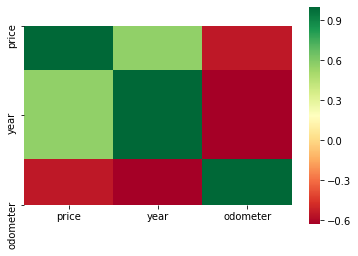

In [9]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [10]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

df[['manufacturer', 'model', 'condition','cylinders','fuel','transmission','drive','size','type']] = df[['manufacturer', 'model', 'condition','cylinders','fuel','transmission','drive','size','type']] .apply(le.fit_transform)

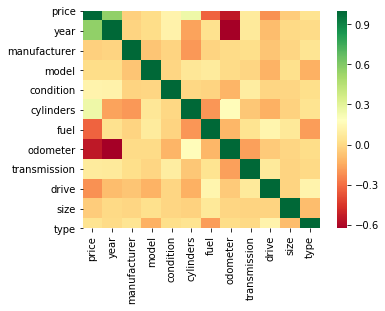

In [11]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

C:\Users\effieklestz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\effieklestz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


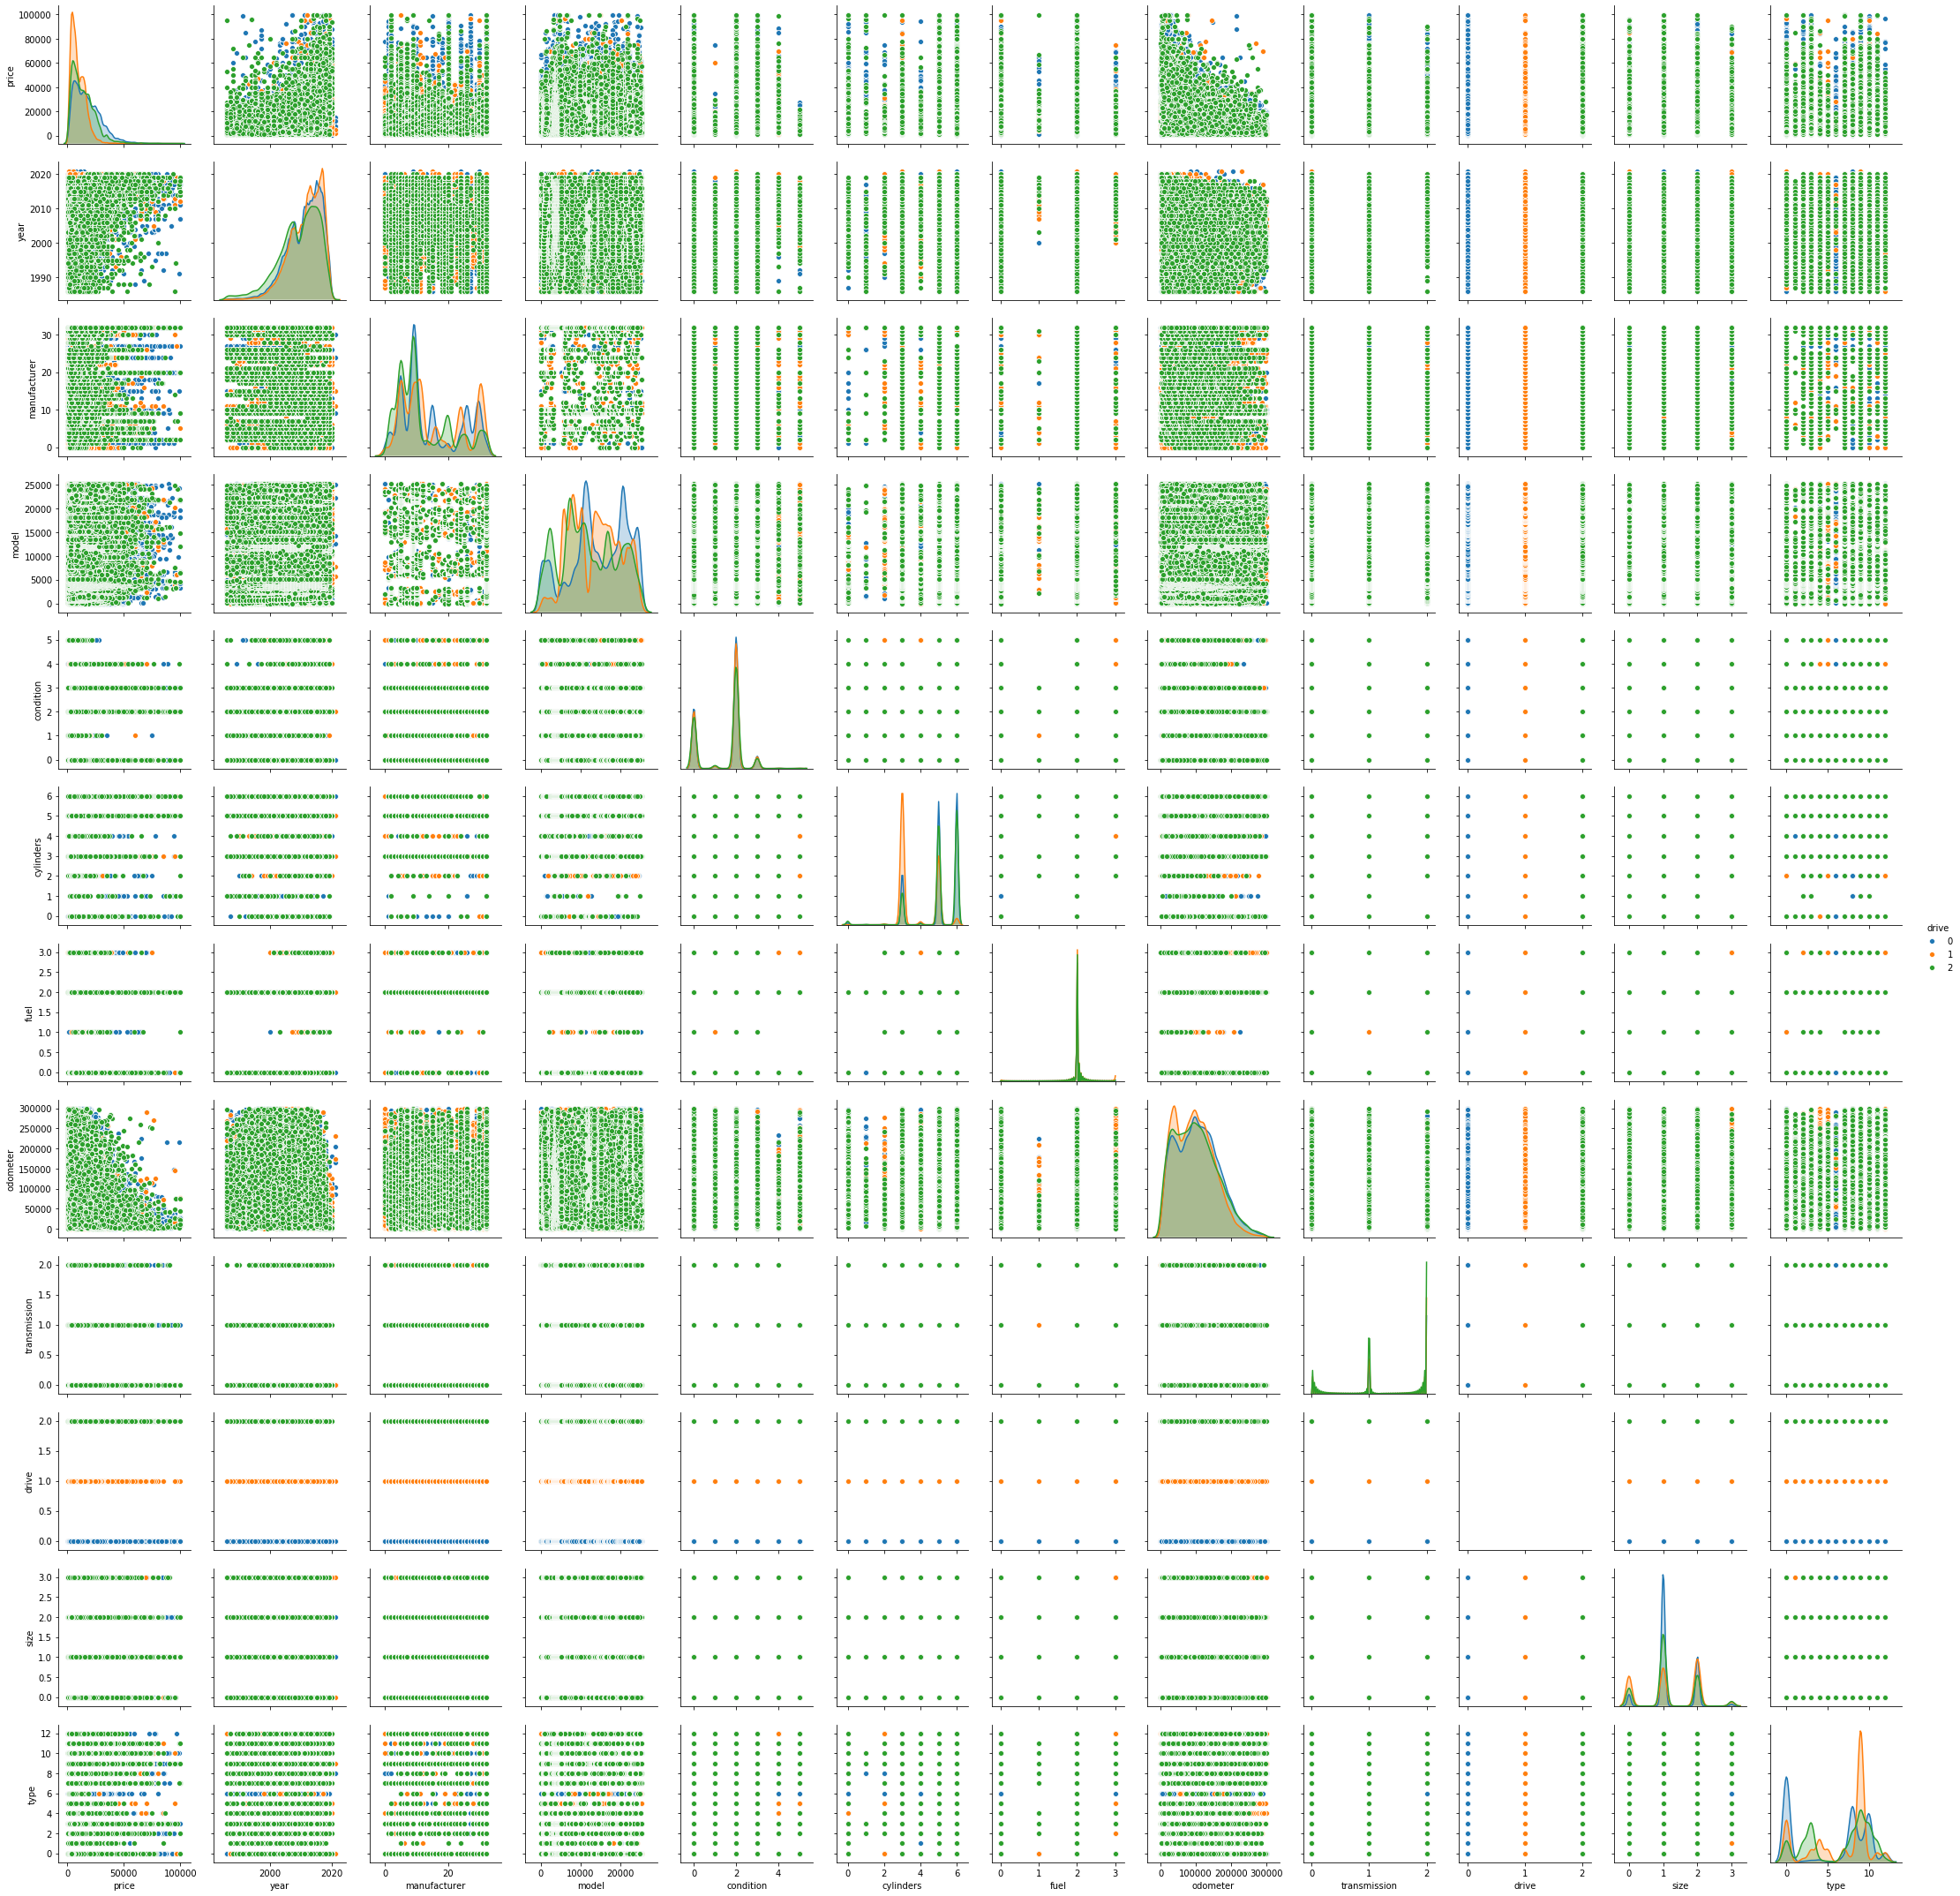

In [13]:
sns.pairplot(df , hue='drive')

AttributeError: 'PathCollection' object has no property 'col'

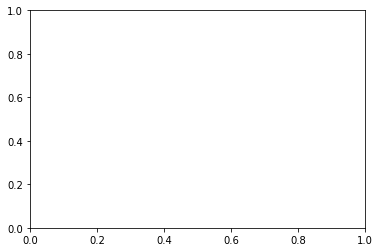

In [12]:

ax = sns.scatterplot(x="year", y="price",
                     col="drive", alpha=0.3,
                     sizes=(10, 200),
                     data=df)

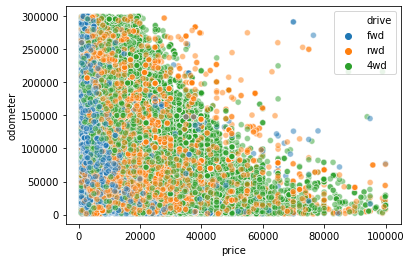

In [89]:
ax = sns.scatterplot(x="price", y="odometer",
                     hue="drive", alpha= 0.5,
                     sizes=(5, 100),
                     data=df)

In [90]:
price_20 = df['price'] > 20000
print(type(price_20))

<class 'pandas.core.series.Series'>


Text(0, 0.5, 'Frequency')

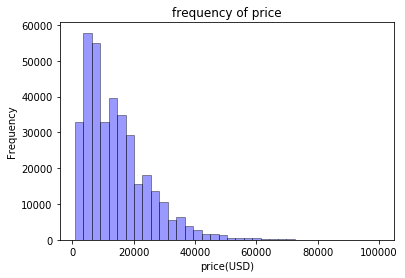

In [91]:
sns.distplot(df['price'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('frequency of price')
plt.xlabel('price(USD)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

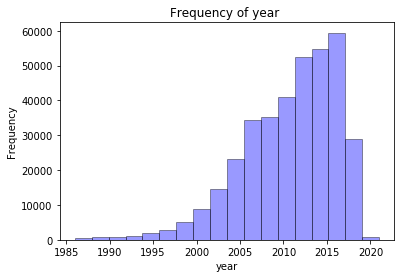

In [92]:
sns.distplot(df['year'], hist=True, kde=False, 
             bins=int(180/10), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Frequency of year ')
plt.xlabel('year')
plt.ylabel('Frequency')

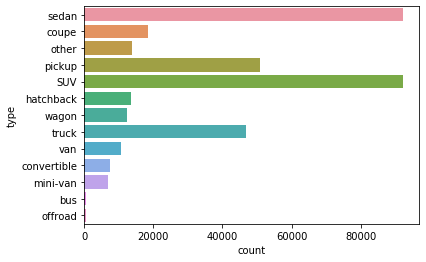

In [95]:
sns.countplot(y=df['type'])
plt.show()
#change pick to truck

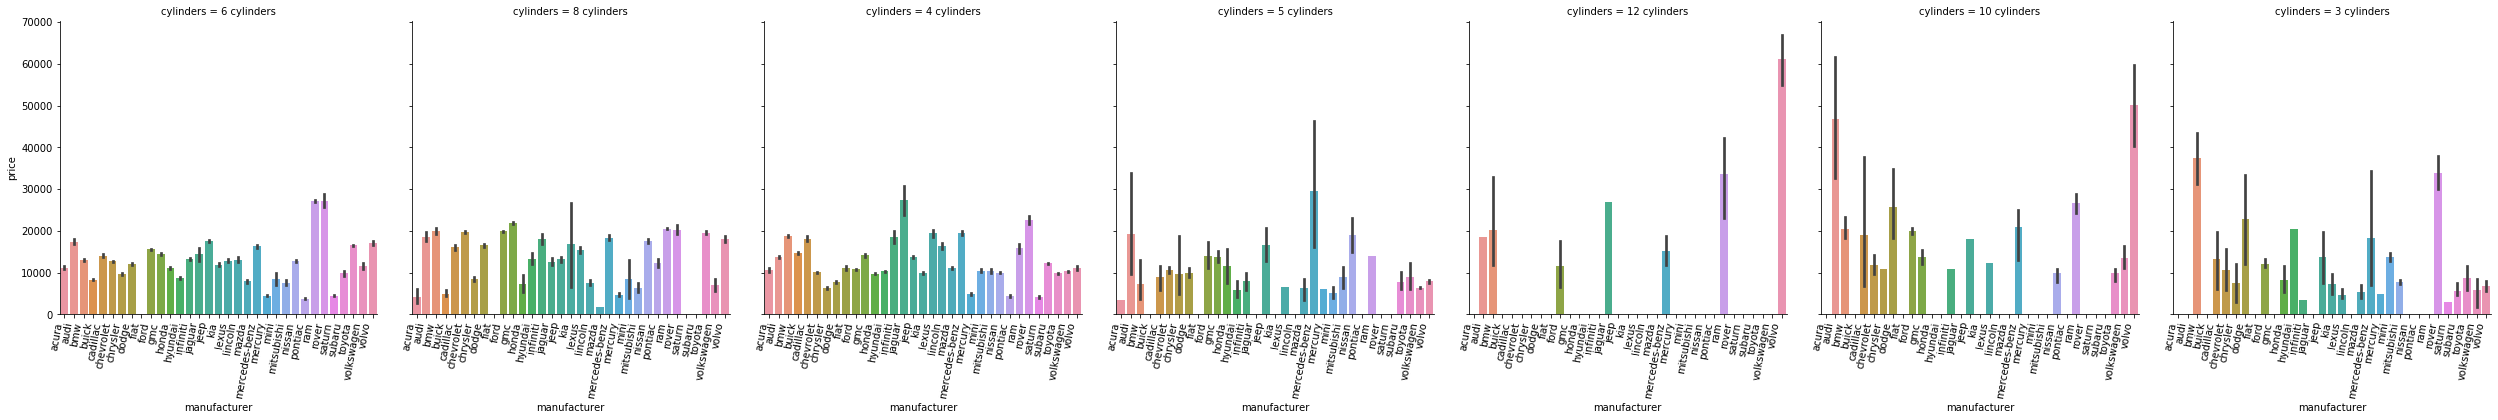

In [96]:
chart = sns.catplot(y='price', x='manufacturer', col= 'cylinders', kind='bar', data=df[df['year'] >= 2000])

chart.set_xticklabels(rotation=80,horizontalalignment='right')

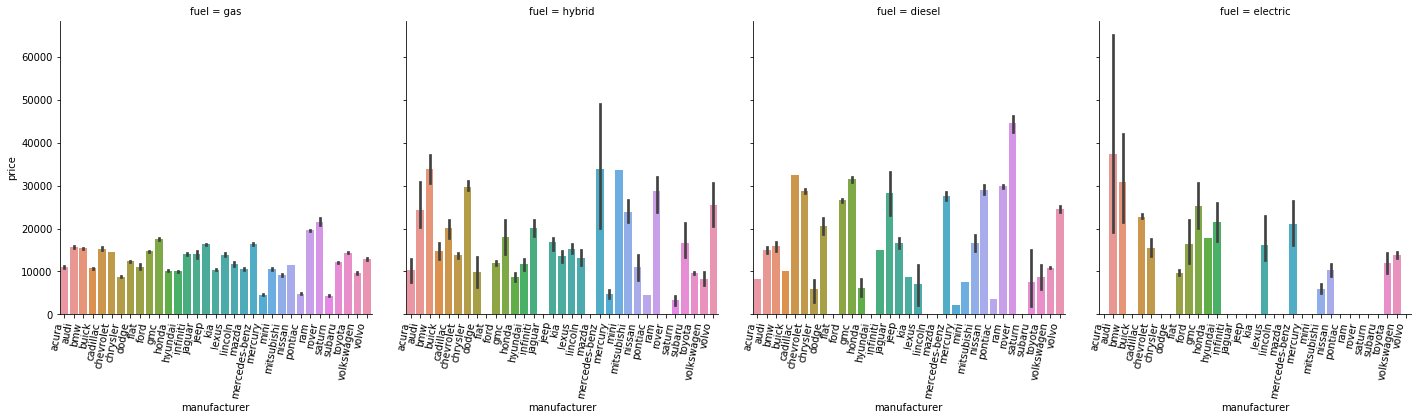

In [97]:
chart = sns.catplot(y='price', x='manufacturer', col= 'fuel', kind='bar', data=df[df['year'] >= 2000])

chart.set_xticklabels(rotation=80,horizontalalignment='right')

In [83]:
import numpy as np
avg_odo_cond =df.groupby(['fuel','year','manufacturer'])['price'].mean()
print(avg_odo_cond)

fuel    year    manufacturer 
diesel  1986.0  chevrolet         9694.000000
                ford              7000.000000
                gmc              10950.000000
                rover            24000.000000
                volvo             6983.333333
                                     ...     
hybrid  2019.0  ram              31290.750000
                subaru           35991.000000
                toyota           30618.800000
        2020.0  mercedes-benz    59995.000000
                toyota           23981.000000
Name: price, Length: 1651, dtype: float64


In [84]:
print(df.shape)

(366490, 12)


In [98]:
df.to_csv('vehicles_cleaned_vis.csv')
